# Projet numero 1 de Machine Learning 1
**********
Auteur: Moussa DIEME , Etudiant en ise 2 \
Charge de cour:Mme Mously DIAW 
**********
L'objectif de la presente etude est d'optimiser les resultats obtenues par les modeles modèles Ridge, Lasso, et ElasticNet.Ce travail sera par la suite suivi d'une analyse quelques variables en fonction du modele

## Chargement des packages

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport 
from yellowbrick.regressor import ResidualsPlot


## Data init

In [2]:
data = pd.read_csv( "data/billets.csv", sep=";")

In [3]:
#------------------------------------------ Infos generale du dataset

In [4]:
data.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
# Generate descriptive statistics
data.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


## Exploration

In [7]:
# --------------------------------- Missing values

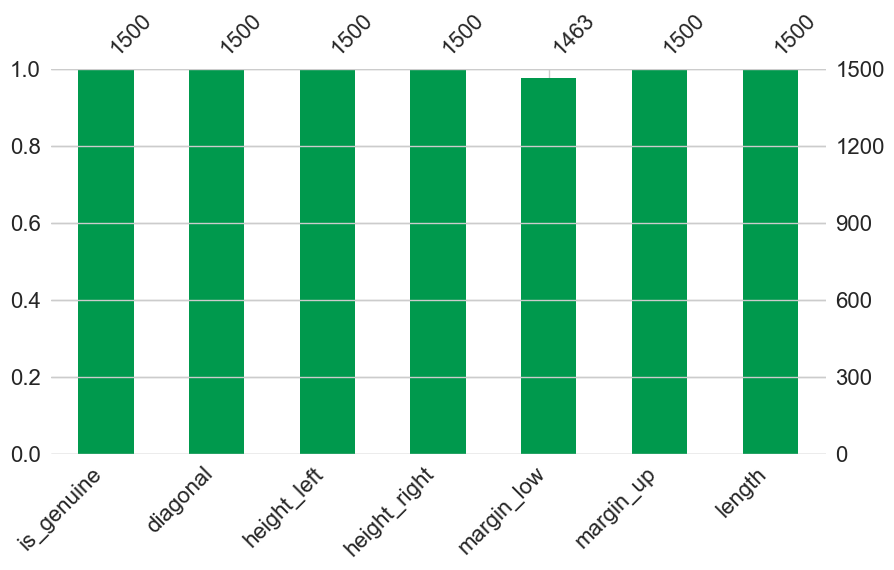

In [8]:
msno.bar(data, figsize=(10, 5), color=(0., 0.6, 0.3))  
plt.show()

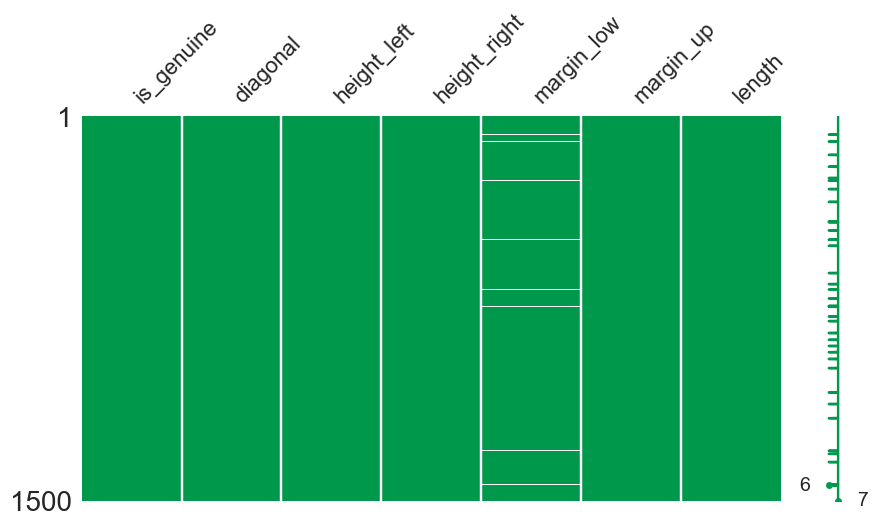

In [9]:
# A matrix visualization of the nullity of the given DataFrame (pick out patterns in data completion).
msno.matrix(data, figsize=(10, 5), color=(0., 0.6, 0.3)) 
plt.show()

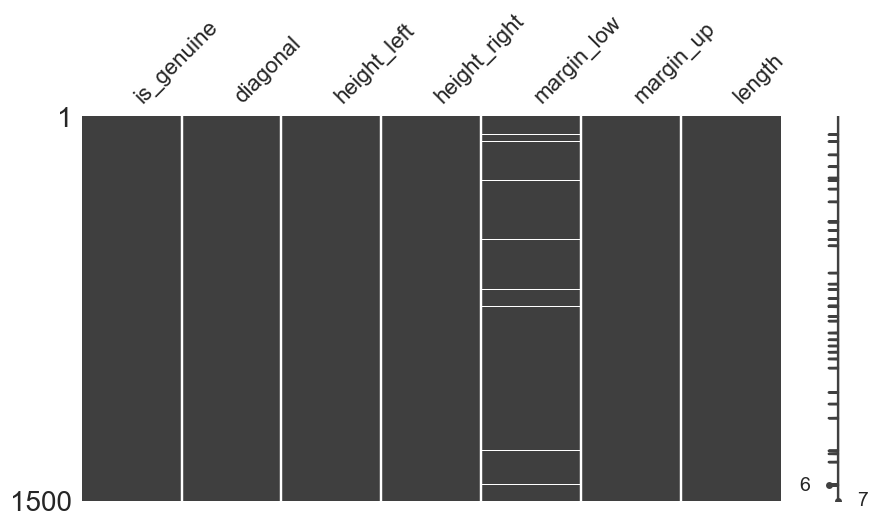

In [10]:
# A matrix visualization of the nullity of the given DataFrame (pick out patterns in data completion).

msno.matrix(data, figsize=(10, 5));

In [11]:
# Return a Series containing counts of unique values.

data.is_genuine.value_counts(dropna=False,  # If True, don't include counts of NaN.
                             normalize=False,  # If True then the object returned will contain the relative frequencies of the unique values.
                            )

is_genuine
True     1000
False     500
Name: count, dtype: int64

In [12]:
# ---------------------------- Representation graphique

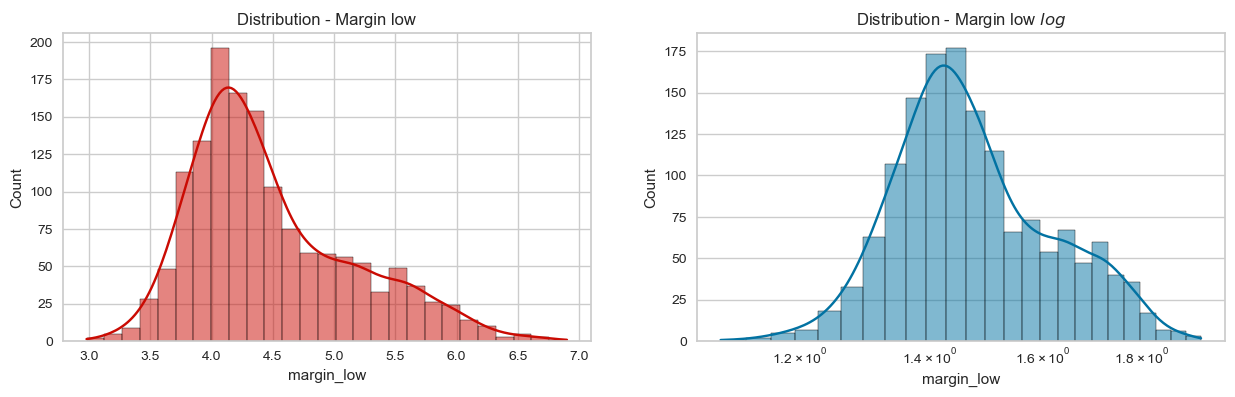

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data["margin_low"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - Margin low')

sns.histplot(np.log(data["margin_low"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - Margin low $log$')
axes[1].set_xscale('log');

## Preparation des donnees

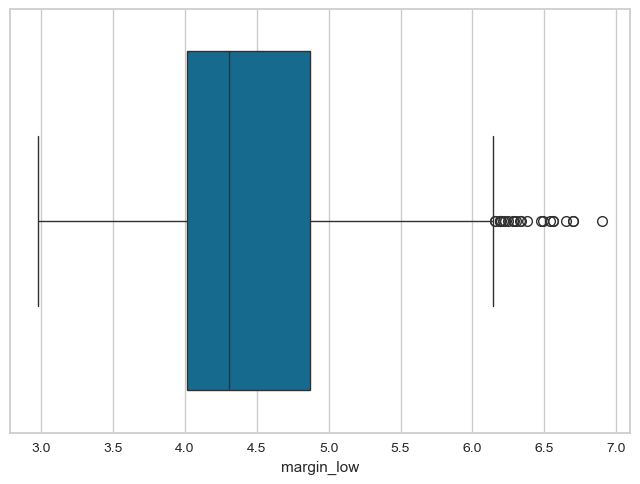

In [14]:
sns.boxplot(data["margin_low"], orient="h");

In [15]:
# -------------------------------  Distribution suivant le type de billet

C:\Users\HP\AppData\Local\Temp\ipykernel_22336\2241447635.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);


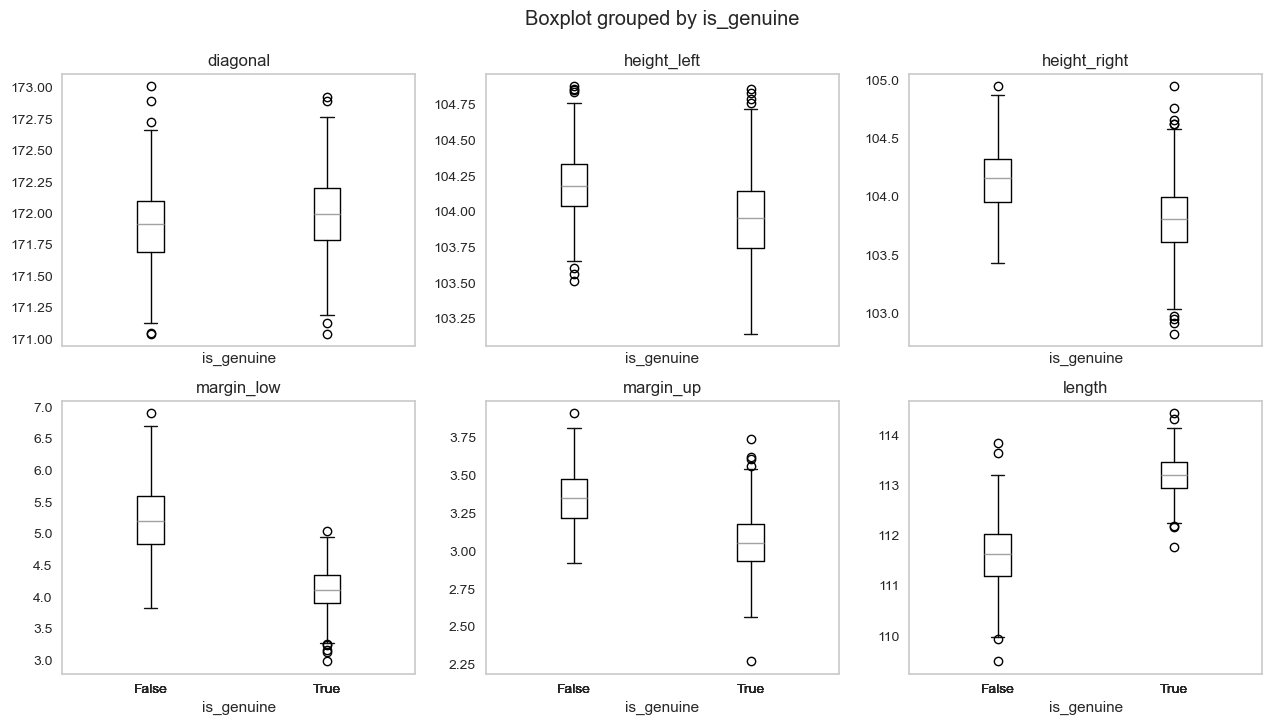

In [16]:
num_columns = list(data.select_dtypes(include=[int, float]).columns) # extraction des colonnes numériques/décimales
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False, sharex=True)
data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);

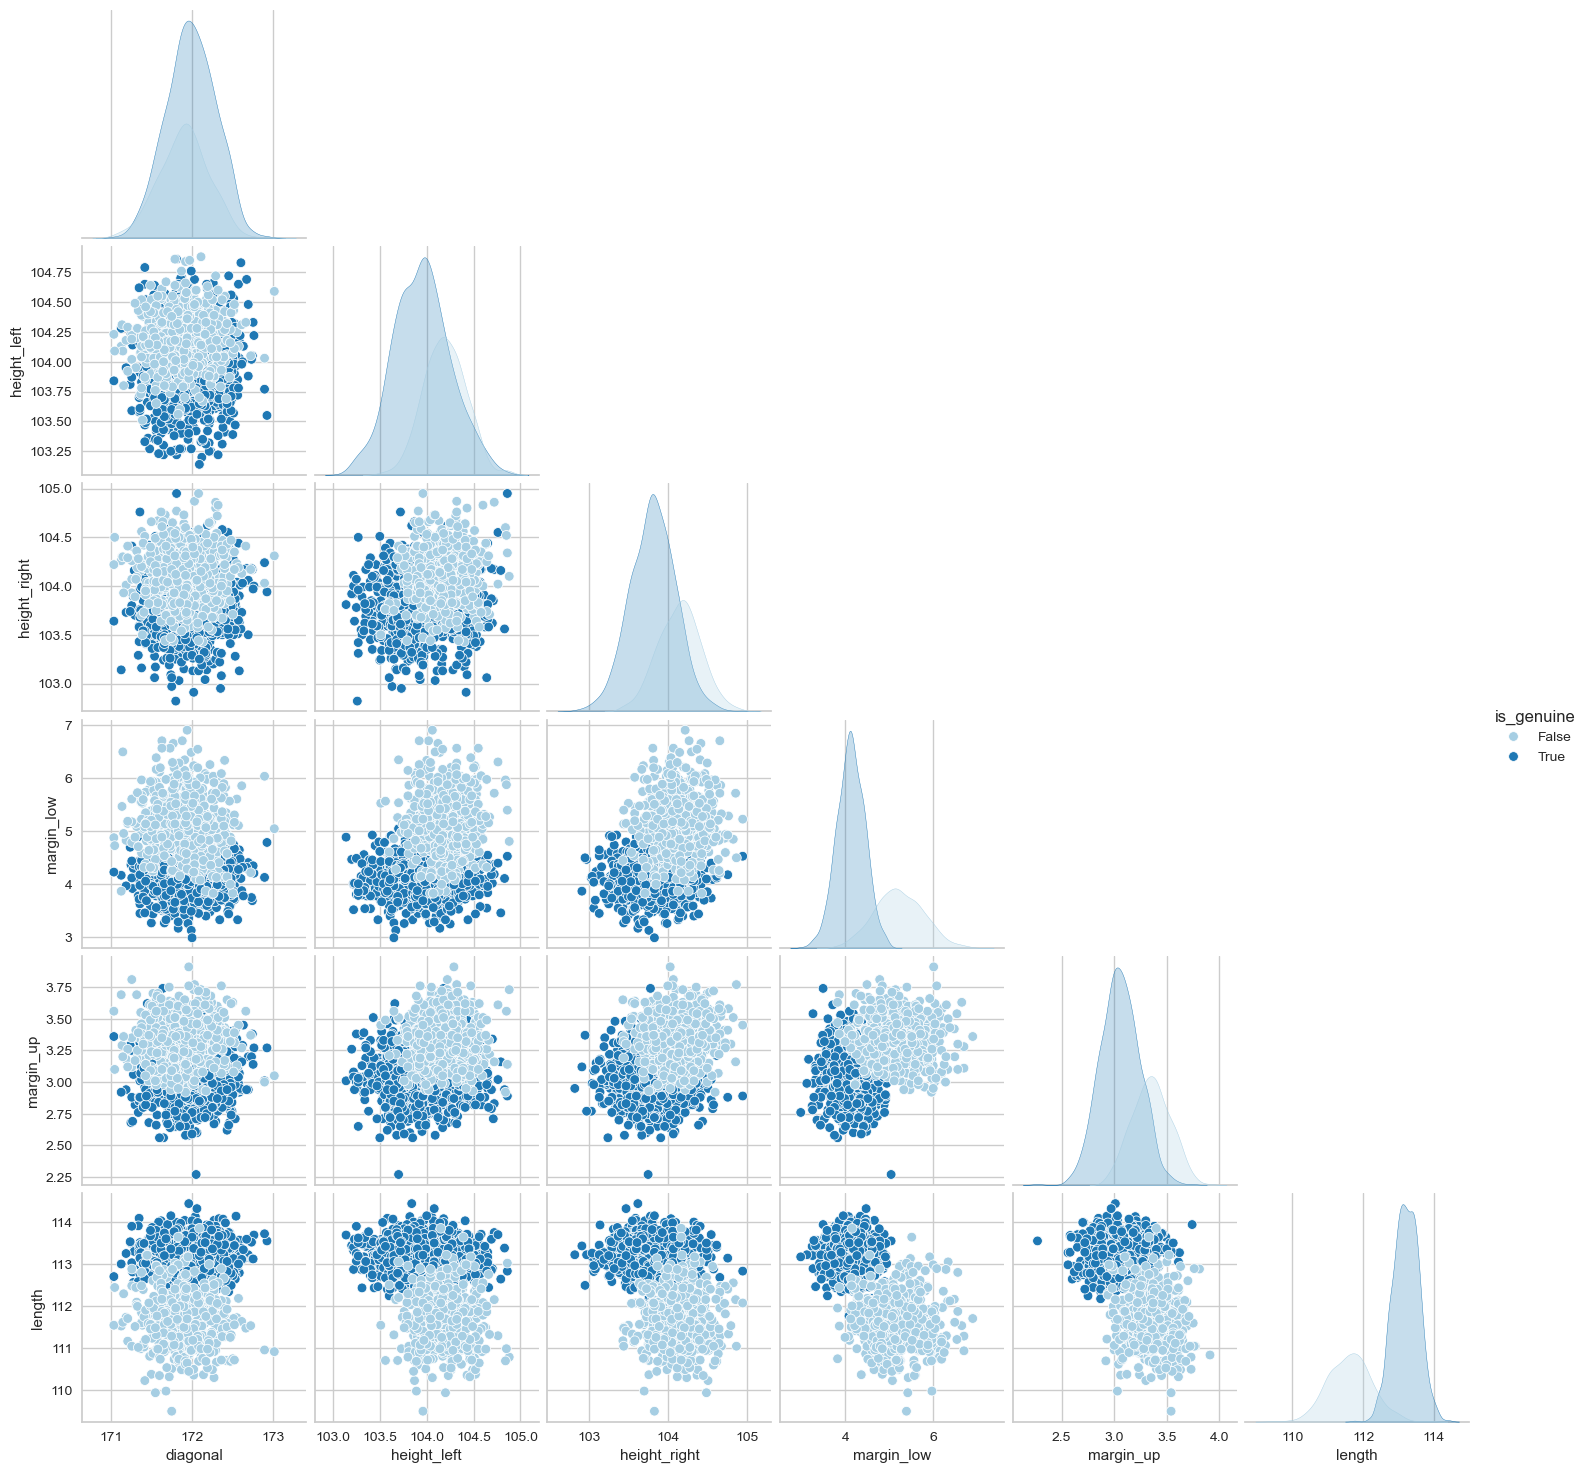

In [17]:

sns.pairplot(data, hue="is_genuine", palette="Paired", corner=True, diag_kind="kde")

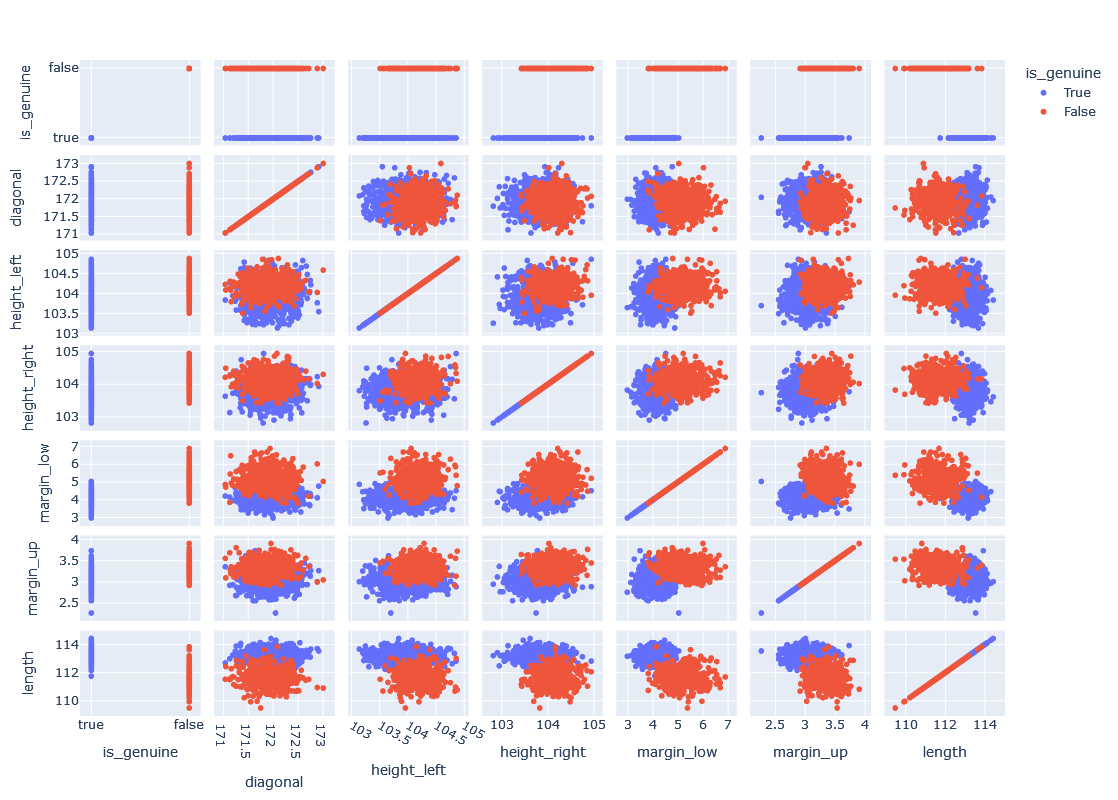

In [20]:
px.scatter_matrix(data,
                  color="is_genuine",
                  width=None,
                  height=800,)

--------
# Contribution
-----------------

## -------------- Correlation

In [29]:
data.select_dtypes(include=[int, float]).corr(method="pearson")

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


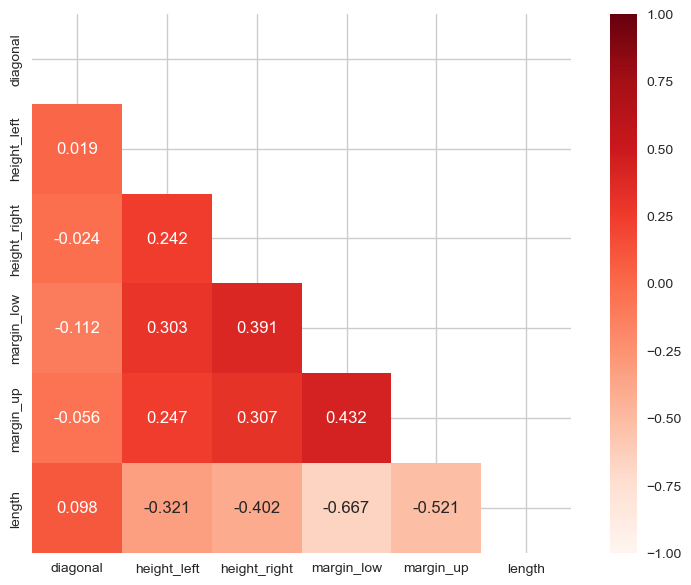

In [26]:
# Calcul de la matrice de correlation

# Heatmap
plt.figure(figsize=(10, 7))
corr = data.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Reds', annot=True, square=True,
            fmt='.3f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);


## Modelisation

In [31]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

-------------

La variable cible ne doit pas contenir de valeurs manquantes, car chaque billet doit nécessairement avoir une valeur associée à margin_low. Par conséquent, nous allons entraîner et évaluer le modèle sur l'ensemble des données complètes.

Dans ce jeu de données, la seule variable présentant des valeurs manquantes est margin_low. Nous allons donc filtrer les valeurs nulles de cette colonne, comme suit :

---------------

In [32]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [35]:
# Creation des variables explicatives
# X :liste des variables explicatives et y : variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

In [36]:
X.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [37]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

## Split du dataset et standardisation

In [43]:
# ----------------------------- Split
# 30% reserve pour le teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


In [42]:
# ------------------------- Standardisons 

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# ----------------------------------Rigde

In [47]:

ridge = linear_model.Ridge(alpha=1.)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)

# On obtient l'erreur quadratique ci-dessous
print(ridge_error)

0.2162136226425012


In [48]:
mse = metrics.mean_squared_error(ridge.predict(X_test), y_test)
rmse = np.sqrt(mse)  # metrics.mean_squared_error(ridge.predict(X_test), y_test, squared=False)
mae = metrics.mean_absolute_error(ridge.predict(X_test), y_test)

mse, rmse, mae

(0.2162136226425012, 0.46498776612132625, 0.35629319455565156)

In [49]:
# Fonction d'entrainement
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {error_test}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

In [50]:
# Train 
ridge_error = train_model(model=linear_model.Ridge(alpha=1.),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.2162136226425012


# ----------------------------------Lasso

In [51]:
# Train 
lasso_error = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.42698000593598173


# ----------------------------------Lasso

In [52]:
# Train and evaluate ridge regression
elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test_std, y_test=y_test)

Model error: 0.42698000593598173


# EXERCICE 1

Dans la cellule précédente, veuillez analyser les variables explicatives: que constatez vous entre le jeu de train et le jeu de test?

## Comparaison des distributions des variables entre les ensembles d'entraînement et de test.

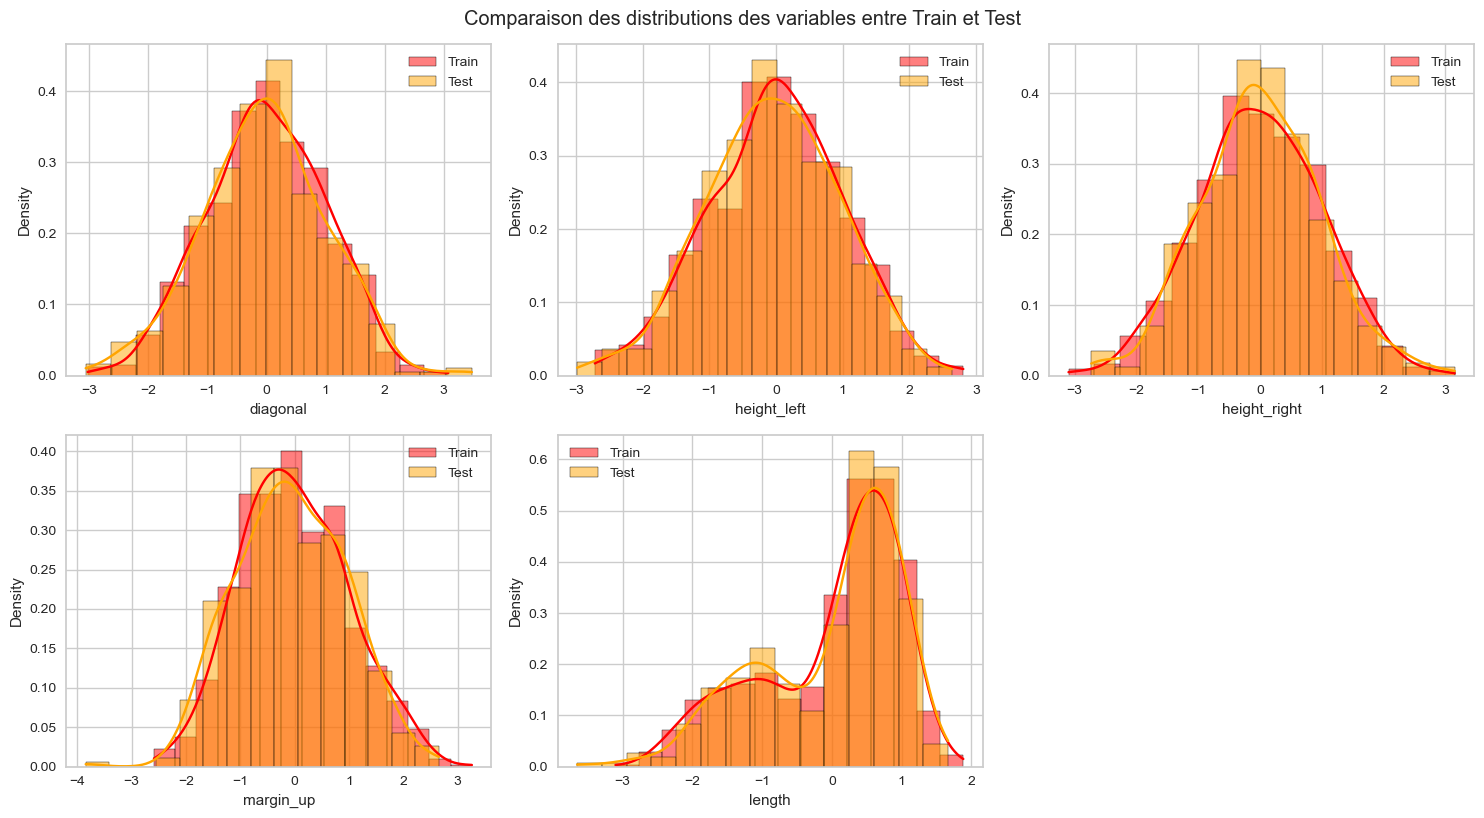

In [59]:
vars = ["diagonal", "height_left", "height_right", "margin_up", "length"]
plt.figure(figsize=(15, 8))

# Tracer un histogramme pour chaque variable
for i, var in enumerate(vars):
    plt.subplot(2, len(vars) // 2 + 1, i + 1)
    sns.histplot(X_train_std[:, i], color="red", label="Train", kde=True, stat="density", bins=15)
    sns.histplot(X_test_std[:, i], color="orange", label="Test", kde=True, stat="density", bins=15)
    plt.xlabel(var)
    plt.legend()
    plt.tight_layout()

plt.suptitle("Comparaison des distributions des variables entre Train et Test", y=1.02)
plt.show()

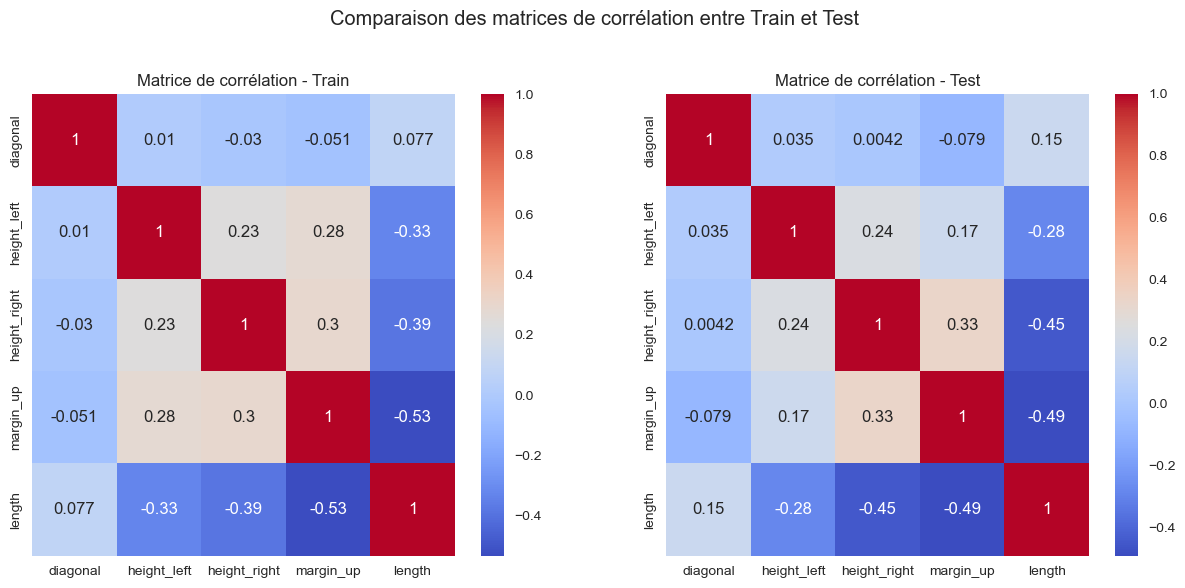

In [54]:
train_df = pd.DataFrame(X_train_std, columns=vars)
test_df = pd.DataFrame(X_test_std, columns=vars)

# Calculer les matrices de corrélation
train_corr = train_df.corr()
test_corr = test_df.corr()

# Tracer les matrices de corrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(train_corr, annot=True, cmap="coolwarm", ax=ax1)
ax1.set_title("Matrice de corrélation - Train")

sns.heatmap(test_corr, annot=True, cmap="coolwarm", ax=ax2)
ax2.set_title("Matrice de corrélation - Test")

plt.suptitle("Comparaison des matrices de corrélation entre Train et Test", y=1.02)
plt.show()

-----
Les distributions des variables explicatives sont similaires entre le jeu de train et le jeu de test, ce qui indique une bonne représentativité des deux ensembles. Cela suggère que les deux jeux de données partagent des caractéristiques comparables, assurant une cohérence pour la modélisation.
------

In [ ]:
### Exercic 2